<a href="https://colab.research.google.com/github/CheesyPitsa/lab2.7/blob/main/mnist_encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input
from tensorflow.keras import utils
 

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


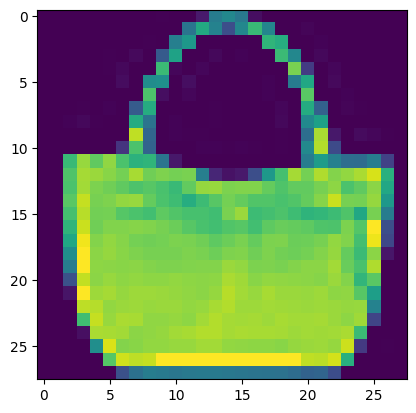

In [3]:
plt.figure()
plt.imshow(x_train[100])
plt.grid(False)

In [4]:
x_train = x_train/ 255
x_test = x_test/ 255

In [5]:
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test  = np.reshape(x_test,  (len(x_test),  28, 28, 1))

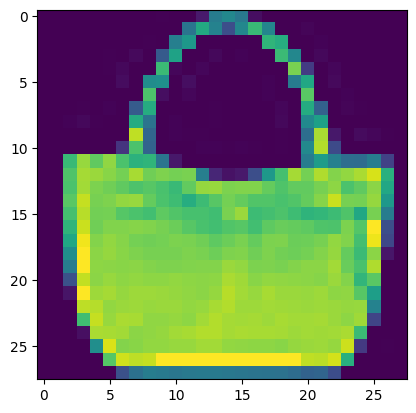

In [6]:
plt.figure()
plt.imshow(x_train[100])
plt.grid(False)

In [7]:
batch_size = 100

input_img = Input((28, 28, 1))
x = Flatten()(input_img)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
encoded = Dense(49, activation='relu')(x)

d = Dense(64, activation='relu')(encoded)
d = Dense(28 * 28, activation='sigmoid')(d)
decoded = Reshape((28, 28, 1))(d)

autoencoder = keras.Model(input_img, decoded, name="autoencoder")
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [8]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=64,
                shuffle=True)

Epoch 1/10
938/938 [==============================] - 15s 11ms/step - loss: 0.0299
Epoch 2/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0179
Epoch 3/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0156
Epoch 4/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0143
Epoch 5/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0134
Epoch 6/10
938/938 [==============================] - 8s 8ms/step - loss: 0.0128
Epoch 7/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0123
Epoch 8/10
938/938 [==============================] - 8s 8ms/step - loss: 0.0119
Epoch 9/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0116
Epoch 10/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0113


In [9]:
n = 10

imgs = x_test[:n]
decoded_imgs = autoencoder.predict(x_test[:n], batch_size=n)

1/1 [==============================] - 0s 106ms/step


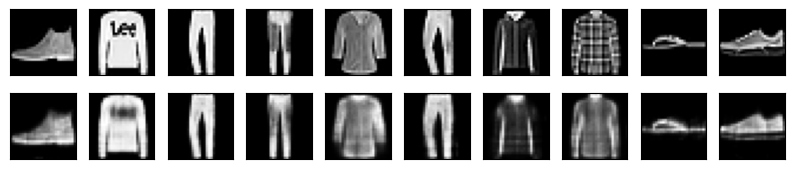

In [10]:
plt.figure(figsize=(n, 2))
for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(imgs[i].squeeze(), cmap='gray')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax2 = plt.subplot(2, n, i + n + 1)
  plt.imshow(decoded_imgs[i].squeeze(), cmap='gray')
  ax2.get_xaxis().set_visible(False)
  ax2.get_yaxis().set_visible(False)

plt.show()

In [11]:
def plot_digits(*images):
  images = [x.squeeze() for x in images]
  n = images[0].shape[0]

  plt.figure(figsize=(n, len(images)))
  for j in range(n):
    for i in range(len(images)):
      ax = plt.subplot(len(images), n, i * n + j + 1)
      plt.imshow(images[i][j])
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

  plt.show()

In [12]:
def plot_homotopy(frm, to, n=10, autoencoder=None):
  z = np.zeros(([n] + list(frm.shape)))
  for i, t in enumerate(np.linspace(0., 1., n)):
    z[i] = frm * (1 - t) + to * t 
  if autoencoder:
    plot_digits(autoencoder.predict(z, batch_size=n))
  else:
    plot_digits(z)


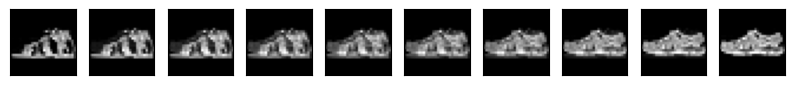

1/1 [==============================] - 0s 19ms/step


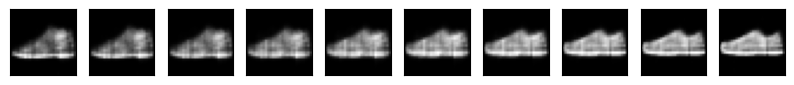

In [13]:
frm, to = x_test[y_test == 5][1:3]
plot_homotopy(frm, to)
plot_homotopy(frm, to, autoencoder=autoencoder)